# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This flight was one of the ...
1,Not Verified | It seems that there is a race t...
2,Not Verified | As a Spanish born individual l...
3,✅ Trip Verified | A rather empty and quiet fl...
4,✅ Trip Verified | Easy check in and staff mem...


In [4]:
df.to_csv("BA_reviews.csv")

In [5]:
df.head(2)

,reviews
0,✅ Trip Verified | This flight was one of the ...
1,Not Verified | It seems that there is a race t...


In [6]:
data=df.copy()

In [7]:
data.head()

,reviews
0,✅ Trip Verified | This flight was one of the ...
1,Not Verified | It seems that there is a race t...
2,Not Verified | As a Spanish born individual l...
3,✅ Trip Verified | A rather empty and quiet fl...
4,✅ Trip Verified | Easy check in and staff mem...


In [8]:
!pip install textblob

In [9]:
import pandas as pd
from textblob import TextBlob

0.08283420177416942


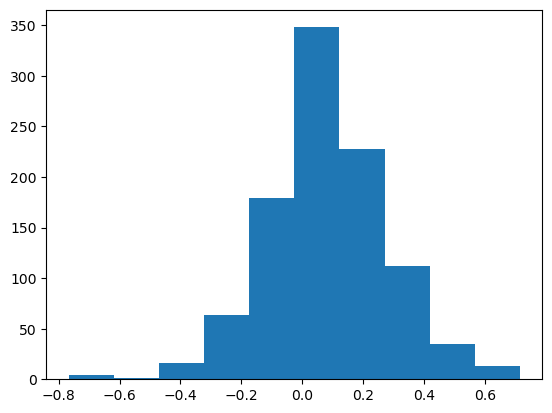

positive    668
negative    323
neutral       9
Name: sentiment_label, dtype: int64


In [10]:
data = pd.read_csv('BA_reviews.csv')

# Create a new column in the DataFrame to store the sentiment scores
data['sentiment'] = data['reviews'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Print the average sentiment score
print(data['sentiment'].mean())

# Plot a histogram of the sentiment scores
import matplotlib.pyplot as plt
plt.hist(data['sentiment'])
plt.show()

#create a new column to store the sentiment label
data['sentiment_label'] = data['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')

#print the overall sentiment of the tweets
print(data['sentiment_label'].value_counts())

In [11]:
data.reset_index()

,index,Unnamed: 0,reviews,sentiment,sentiment_label
0,0,0,✅ Trip Verified | This flight was one of the ...,-0.096390,negative
1,1,1,Not Verified | It seems that there is a race t...,-0.080000,negative
2,2,2,Not Verified | As a Spanish born individual l...,0.061335,positive
3,3,3,✅ Trip Verified | A rather empty and quiet fl...,0.131448,positive
4,4,4,✅ Trip Verified | Easy check in and staff mem...,0.353283,positive
...,...,...,...,...,...
995,995,995,✅ Trip Verified | Miami to London. My most re...,0.167703,positive
996,996,996,✅ Trip Verified | Gatwick to Barbados in Dece...,0.025000,positive
997,997,997,✅ Trip Verified | London Heathrow to Dallas. ...,0.151683,positive
998,998,998,✅ Trip Verified | Decided to go in Club Europe...,-0.068864,negative


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   reviews          1000 non-null   object 
 2   sentiment        1000 non-null   float64
 3   sentiment_label  1000 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [13]:
data.isnull().sum()

Unnamed: 0         0
reviews            0
sentiment          0
sentiment_label    0
dtype: int64

In [14]:
data.drop(columns=['Unnamed: 0'] , inplace=True)

In [15]:
data

,reviews,sentiment,sentiment_label
0,✅ Trip Verified | This flight was one of the ...,-0.096390,negative
1,Not Verified | It seems that there is a race t...,-0.080000,negative
2,Not Verified | As a Spanish born individual l...,0.061335,positive
3,✅ Trip Verified | A rather empty and quiet fl...,0.131448,positive
4,✅ Trip Verified | Easy check in and staff mem...,0.353283,positive
...,...,...,...
995,✅ Trip Verified | Miami to London. My most re...,0.167703,positive
996,✅ Trip Verified | Gatwick to Barbados in Dece...,0.025000,positive
997,✅ Trip Verified | London Heathrow to Dallas. ...,0.151683,positive
998,✅ Trip Verified | Decided to go in Club Europe...,-0.068864,negative


In [16]:
data['sentiment'].value_counts()

 0.000000    9
 0.177778    3
 0.300000    3
 0.175000    3
-0.066667    3
            ..
 0.201512    1
 0.050360    1
 0.052273    1
-0.089744    1
 0.124167    1
Name: sentiment, Length: 953, dtype: int64

In [17]:
data['sentiment_label'].value_counts()

positive    668
negative    323
neutral       9
Name: sentiment_label, dtype: int64

In [18]:
data1=data['reviews'].str.split(" " , 3,  expand=True)[0]
data1

0        ✅
1      Not
2      Not
3        ✅
4        ✅
      ... 
995      ✅
996      ✅
997      ✅
998      ✅
999      ✅
Name: 0, Length: 1000, dtype: object

In [19]:
data2=data['reviews'].str.split(" " , 3,  expand=True)[1]
data2

0          Trip
1      Verified
2      Verified
3          Trip
4          Trip
         ...   
995        Trip
996        Trip
997        Trip
998        Trip
999        Trip
Name: 1, Length: 1000, dtype: object

In [20]:
data3=data['reviews'].str.split(" " , 3,  expand=True)[2]
data3

0      Verified
1             |
2             |
3      Verified
4      Verified
         ...   
995    Verified
996    Verified
997    Verified
998    Verified
999    Verified
Name: 2, Length: 1000, dtype: object

In [21]:
data['Trip or not']=data1.map( str) + data2.map( str) + data3.map( str)

In [23]:
data['reviews']=data['reviews'].str.split(" " , 3,  expand=True)[3]

In [24]:
data

,reviews,sentiment,sentiment_label,Trip or not
0,| This flight was one of the worst I have eve...,-0.096390,negative,✅TripVerified
1,It seems that there is a race to the bottom am...,-0.080000,negative,NotVerified|
2,As a Spanish born individual living in Englan...,0.061335,positive,NotVerified|
3,| A rather empty and quiet flight to Tel Aviv...,0.131448,positive,✅TripVerified
4,| Easy check in and staff member was polite a...,0.353283,positive,✅TripVerified
...,...,...,...,...
995,| Miami to London. My most recent BA experien...,0.167703,positive,✅TripVerified
996,| Gatwick to Barbados in December 2017. On a ...,0.025000,positive,✅TripVerified
997,| London Heathrow to Dallas. The aircraft was...,0.151683,positive,✅TripVerified
998,| Decided to go in Club Europe for this relati...,-0.068864,negative,✅TripVerified


In [25]:
data=data.apply(lambda x: x.str.replace('|', '') if x.dtype == "object" else x)

C:\Users\Hp\AppData\Local\Temp\ipykernel_1656\1545352812.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data=data.apply(lambda x: x.str.replace('|', '') if x.dtype == "object" else x)


In [26]:
# we cleaned our data 
data.head()

,reviews,sentiment,sentiment_label,Trip or not
0,This flight was one of the worst I have ever...,-0.096390,negative,✅TripVerified
1,It seems that there is a race to the bottom am...,-0.080000,negative,NotVerified
2,As a Spanish born individual living in Englan...,0.061335,positive,NotVerified
3,"A rather empty and quiet flight to Tel Aviv,...",0.131448,positive,✅TripVerified
4,Easy check in and staff member was polite an...,0.353283,positive,✅TripVerified


In [27]:
disliked_flight=data[(data['sentiment_label']=='negative') & (data['Trip or not']=='✅TripVerified')]
disliked_flight

,reviews,sentiment,sentiment_label,Trip or not
0,This flight was one of the worst I have ever...,-0.096390,negative,✅TripVerified
7,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,-0.147953,negative,✅TripVerified
10,Probably the worst business class experience ...,-0.083001,negative,✅TripVerified
11,"Definitely not recommended, especially for bu...",-0.038542,negative,✅TripVerified
16,BA website did not work (weirdly deleted my ...,-0.101373,negative,✅TripVerified
...,...,...,...,...
989,Paid for a Vueling Airlines flight from Flor...,-0.166667,negative,✅TripVerified
991,Worst BA flight ever! Flew Tampa to London Ga...,-0.233036,negative,✅TripVerified
992,Flew British Airways from London Heathrow to ...,-0.054167,negative,✅TripVerified
993,Madrid to London. The main plus about this f...,-0.083333,negative,✅TripVerified


In [28]:
canceled_flight=data[(data['sentiment_label']=='negative') & (data['Trip or not']=='NotVerified')]
canceled_flight

,reviews,sentiment,sentiment_label,Trip or not
1,It seems that there is a race to the bottom am...,-0.080000,negative,NotVerified
9,"The staff are friendly. The plane was cold, we...",-0.087121,negative,NotVerified
14,When will BA update their Business class cabi...,-0.011905,negative,NotVerified
21,BA cancelled my flight home to Heathrow on De...,-0.227500,negative,NotVerified
22,"BA cancelled my flight home, the last flight ...",-0.020455,negative,NotVerified
43,Worst experience ever. Outbound flight was can...,-0.358333,negative,NotVerified
75,London to Manchester. British Airways is proba...,-0.433333,negative,NotVerified
78,This review is for BA booking system not a fl...,-0.043939,negative,NotVerified
110,Was going from Belfast to London but they can...,-0.225000,negative,NotVerified
111,Second time getting poor service from BA. 1st...,-0.011111,negative,NotVerified


In [29]:
lucky_flight=data[(data['sentiment_label']=='positive') & (data['Trip or not']=='✅TripVerified')]
lucky_flight

,reviews,sentiment,sentiment_label,Trip or not
3,"A rather empty and quiet flight to Tel Aviv,...",0.131448,positive,✅TripVerified
4,Easy check in and staff member was polite an...,0.353283,positive,✅TripVerified
5,Being a silver flyer and booking a flight th...,0.210714,positive,✅TripVerified
12,BA shuttle service across the UK is still su...,0.322222,positive,✅TripVerified
13,I must admit like many others I tend to avoid...,0.097338,positive,✅TripVerified
...,...,...,...,...
994,London to Moscow. British Airways has downgr...,0.134069,positive,✅TripVerified
995,Miami to London. My most recent BA experienc...,0.167703,positive,✅TripVerified
996,Gatwick to Barbados in December 2017. On a 9...,0.025000,positive,✅TripVerified
997,London Heathrow to Dallas. The aircraft was ...,0.151683,positive,✅TripVerified


In [30]:
unflight=data[(data['sentiment_label']=='positive') & (data['Trip or not']=='NotVerified')]
unflight

,reviews,sentiment,sentiment_label,Trip or not
2,As a Spanish born individual living in Englan...,0.061335,positive,NotVerified
6,I find BA incredibly tacky and constantly loo...,0.104487,positive,NotVerified
8,Great thing about British Airways A380 is the...,0.075123,positive,NotVerified
24,Boarding – at gate at LGW they called Group 1...,0.036052,positive,NotVerified
28,Seat horribly narrow; 3-4-3 on a 777. Thankfu...,0.382500,positive,NotVerified
...,...,...,...,...
852,London Heathrow to Dubai. This was the first ...,0.317997,positive,NotVerified
858,Glasgow to Miami via London. Glasgow to Heath...,0.173299,positive,NotVerified
867,London Heathrow to Düsseldorf. Really good cr...,0.354762,positive,NotVerified
935,"Los Angeles to London. I booked with AA, LAX ...",0.008915,positive,NotVerified


In [38]:
negative_comment=data[(data['sentiment_label']=='negative')]
negative_comment

,reviews,sentiment,sentiment_label,Trip or not
0,This flight was one of the worst I have ever...,-0.096390,negative,✅TripVerified
1,It seems that there is a race to the bottom am...,-0.080000,negative,NotVerified
7,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,-0.147953,negative,✅TripVerified
9,"The staff are friendly. The plane was cold, we...",-0.087121,negative,NotVerified
10,Probably the worst business class experience ...,-0.083001,negative,✅TripVerified
...,...,...,...,...
989,Paid for a Vueling Airlines flight from Flor...,-0.166667,negative,✅TripVerified
991,Worst BA flight ever! Flew Tampa to London Ga...,-0.233036,negative,✅TripVerified
992,Flew British Airways from London Heathrow to ...,-0.054167,negative,✅TripVerified
993,Madrid to London. The main plus about this f...,-0.083333,negative,✅TripVerified


In [42]:
# just focus on  negative_data
negative_data=negative_comment[["reviews" , "Trip or not"]]
negative_data

,reviews,Trip or not
0,This flight was one of the worst I have ever...,✅TripVerified
1,It seems that there is a race to the bottom am...,NotVerified
7,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,✅TripVerified
9,"The staff are friendly. The plane was cold, we...",NotVerified
10,Probably the worst business class experience ...,✅TripVerified
...,...,...
989,Paid for a Vueling Airlines flight from Flor...,✅TripVerified
991,Worst BA flight ever! Flew Tampa to London Ga...,✅TripVerified
992,Flew British Airways from London Heathrow to ...,✅TripVerified
993,Madrid to London. The main plus about this f...,✅TripVerified


In [43]:
negative_data.isnull().sum()

reviews        0
Trip or not    0
dtype: int64

In [44]:
negative_data.shape

(323, 2)

C:\Users\Hp\AppData\Local\Temp\ipykernel_1656\2957137738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_data['sentiment'] = negative_data['reviews'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)


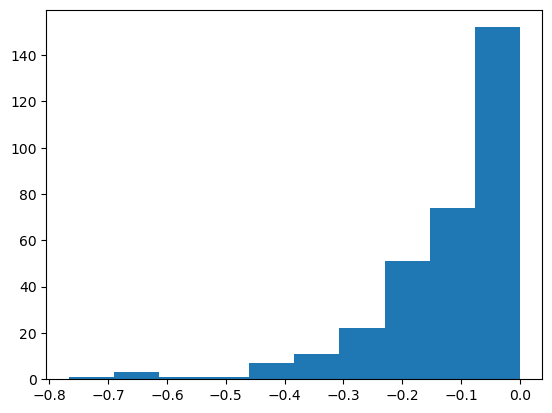

In [45]:
negative_data['sentiment'] = negative_data['reviews'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

# Plot a histogram of the sentiment scores
import matplotlib.pyplot as plt
plt.hist(negative_data['sentiment'])
plt.show()

#create a new column to store the sentiment label
negative_data['sentiment_label'] = negative_data['sentiment'].apply(lambda score: 'positive' if score > 0 else 'negative' if score < 0 else 'neutral')


In [49]:
negative_data

,reviews,Trip or not,sentiment,sentiment_label
0,This flight was one of the worst I have ever...,✅TripVerified,-0.096390,negative
1,It seems that there is a race to the bottom am...,NotVerified,-0.080000,negative
7,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,✅TripVerified,-0.147953,negative
9,"The staff are friendly. The plane was cold, we...",NotVerified,-0.087121,negative
10,Probably the worst business class experience ...,✅TripVerified,-0.083001,negative
...,...,...,...,...
989,Paid for a Vueling Airlines flight from Flor...,✅TripVerified,-0.166667,negative
991,Worst BA flight ever! Flew Tampa to London Ga...,✅TripVerified,-0.233036,negative
992,Flew British Airways from London Heathrow to ...,✅TripVerified,-0.054167,negative
993,Madrid to London. The main plus about this f...,✅TripVerified,-0.083333,negative


In [62]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define the input and output variables
X = data['reviews']
y = data['sentiment_label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the feature matrix
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Train the model
clf = MultinomialNB()
clf.fit(X_train_vectors, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_vectors)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.67


In [80]:
# Define the new text
new_text = "Hi there i loved this"
# Create the feature matrix for the new text
new_text_vector = vectorizer.transform([new_text])

# Make predictions on the new text
new_text_pred = clf.predict(new_text_vector)

# Print the prediction
print("Predicted sentiment: ", new_text_pred)


Predicted sentiment:  ['positive']


In [82]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 338.4 kB/s eta 0:00:00


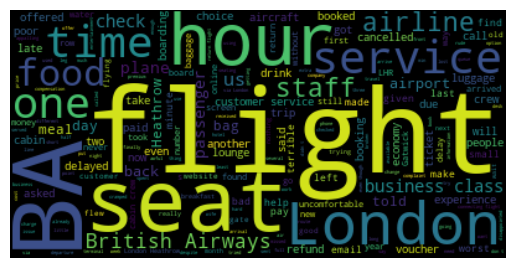

In [95]:
# Create a string from all the text in the 'text_column' column
text = negative_data['reviews'].str.cat(sep=' ')

# Create the word cloud object
wordcloud = WordCloud().generate(text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()